In [2]:
import pandas as pd

data = pd.read_csv('titanic_data/train.csv')

### How much data do we have?

In [3]:
len(data)

891

In [4]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Wchich type of data do we have?

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Age range

In [6]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

### How many passengers survived?

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### How many males and females were there on the board?

In [8]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### In which passenger class were the most people?

In [9]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Showing this data on the graphs

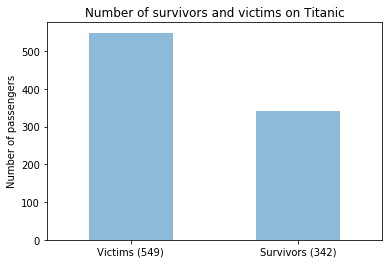

In [12]:
from matplotlib import pyplot as plt
import numpy as np

survivors = data['Survived'].sum()
died = len(data) - survivors

data['Survived'].value_counts().plot(kind='bar', alpha=0.5)
plt.xticks(np.arange(2), ('Victims (' +str(died) + ')', 'Survivors (' + str(survivors) + ')'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Number of survivors and victims on Titanic")
plt.show()

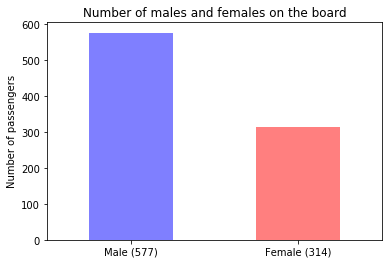

In [11]:
male = data['Sex']=='male'
female = data['Sex']=='female'


data['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'], alpha=0.5)
plt.xticks(np.arange(2), ('Male (' + str(male.sum()) + ')', 'Female (' + str(female.sum()) + ')'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Number of males and females on the board")
plt.show()

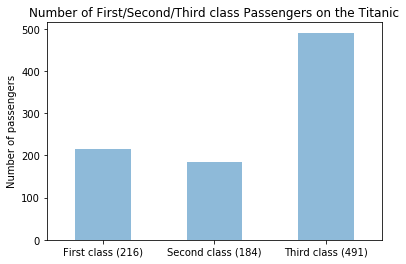

In [12]:
first = data['Pclass']==1
second = data['Pclass']==2
third = data['Pclass']==3

data['Pclass'].value_counts().sort_index().plot(kind='bar', alpha=0.5)
plt.xticks(np.arange(3), ('First class (' + str(first.sum()) + ')', 'Second class (' + str(second.sum()) + ')', 'Third class (' + str(third.sum()) + ')') , rotation=0)
plt.ylabel("Number of passengers")
plt.title("Number of First/Second/Third class Passengers on the Titanic")
plt.show()

### Which age group had the most victims?

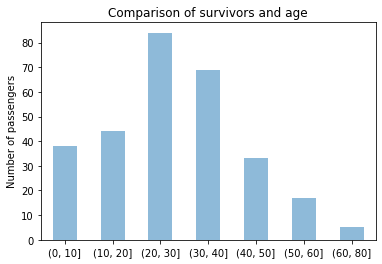

In [13]:
bins = [0, 10, 20, 30, 40, 50, 60, 80]
data['AgeBin'] = pd.cut(data['Age'], bins)

data[data['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar', alpha=0.5)
plt.xticks(rotation=0)
plt.title("Comparison of survivors and age")
plt.ylabel("Number of passengers")
plt.show()

### In which passenger class were the most victims?

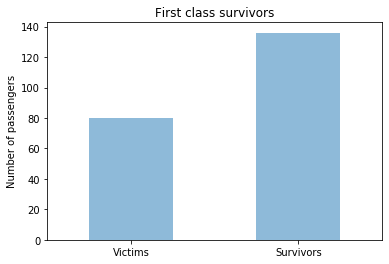

In [14]:
data[data['Pclass']==1]['Survived'].value_counts().sort_index().plot(kind='bar', alpha=0.5)
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("First class survivors")
plt.show()

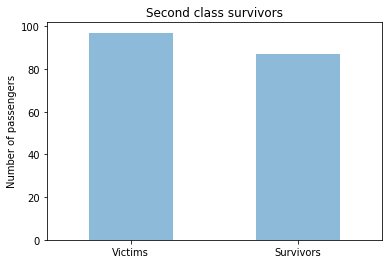

In [15]:
data[data['Pclass']==2]['Survived'].value_counts().sort_index().plot(kind='bar', alpha=0.5)
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Second class survivors")
plt.show()

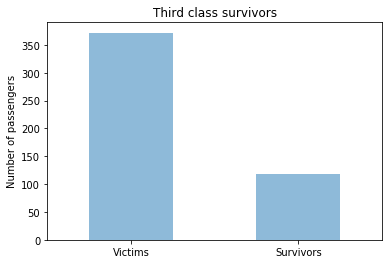

In [16]:
data[data['Pclass']==3]['Survived'].value_counts().sort_index().plot(kind='bar', alpha=0.5)
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Third class survivors")
plt.show()

#### Does gender affect to chances of survival?

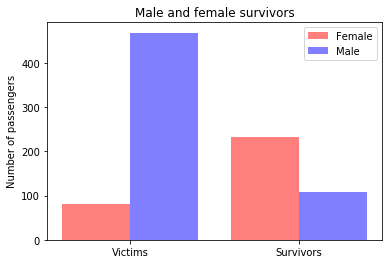

In [17]:
males = data[data['Sex']=='male']['Survived'].value_counts()
females = data[data['Sex']=='female']['Survived'].value_counts()

plt.bar(females.index, females, align='edge', width=-0.4, label='Female', color='red', alpha=0.5)
plt.bar(males.index, males, align='edge', width=0.4, label='Male', color='blue', alpha=0.5)


plt.legend()
plt.xticks(np.arange(len(males)), rotation=0)
plt.ylabel("Number of passengers")
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.title("Male and female survivors")

plt.show()

##### There are more victims among men

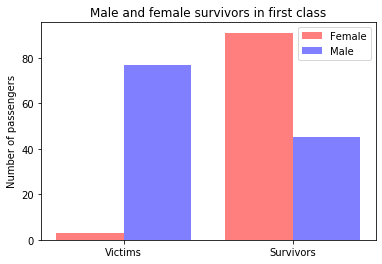

In [18]:
males = data[(data['Sex']=='male') & (data['Pclass'] == 1)]['Survived'].value_counts()
females = data[(data['Sex']=='female') & (data['Pclass']== 1)]['Survived'].value_counts()

plt.bar(females.index, females, align='edge', width=-0.4, label='Female', color='red', alpha=0.5)
plt.bar(males.index, males, align='edge', width=0.4, label='Male', color='blue', alpha=0.5)


plt.legend()
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Male and female survivors in first class")

plt.show()

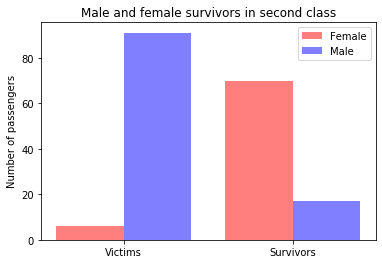

In [19]:
males = data[(data['Sex']=='male') & (data['Pclass'] == 2)]['Survived'].value_counts()
females = data[(data['Sex']=='female') & (data['Pclass']== 2)]['Survived'].value_counts()

plt.bar(females.index, females, align='edge', width=-0.4, label='Female', color='red', alpha=0.5)
plt.bar(males.index, males, align='edge', width=0.4, label='Male', color='blue', alpha=0.5)


plt.legend()
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Male and female survivors in second class")

plt.show()

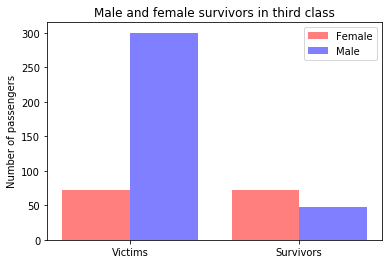

In [21]:
males = data[(data['Sex']=='male') & (data['Pclass'] == 3)]['Survived'].value_counts()
females = data[(data['Sex']=='female') & (data['Pclass']== 3)]['Survived'].value_counts()

plt.bar(females.index, females, align='edge', width=-0.4, label='Female', color='red', alpha=0.5)
plt.bar(males.index, males, align='edge', width=0.4, label='Male', color='blue', alpha=0.5)


plt.legend()
plt.xticks(np.arange(2), ('Victims', 'Survivors'), rotation=0)
plt.ylabel("Number of passengers")
plt.title("Male and female survivors in third class")

plt.show()

## Females had a bigger chance of survival
## The lower the passenger class, the lower the chance of survival